# Final Project
### Group Members: Kate Imas and Oskar Sierzega

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [47]:
# hello

df = pd.read_csv("spotify_songs.csv")
df[["danceability", "tempo", "key", "track_popularity"]].describe()

,danceability,tempo,key,track_popularity
count,32833.000000,32833.000000,32833.000000,32833.000000
mean,0.654850,120.881132,5.374471,42.477081
std,0.145085,26.903624,3.611657,24.984074
min,0.000000,0.000000,0.000000,0.000000
25%,0.563000,99.960000,2.000000,24.000000
50%,0.672000,121.984000,6.000000,45.000000
75%,0.761000,133.918000,9.000000,62.000000
max,0.983000,239.440000,11.000000,100.000000


{'whiskers': [<matplotlib.lines.Line2D object at 0x000001DE793EE000>, <matplotlib.lines.Line2D object at 0x000001DE793EC2C0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001DE793ECC80>, <matplotlib.lines.Line2D object at 0x000001DE793ECA10>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001DE79417AD0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001DE793ED370>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001DE793EDF40>], 'means': []}


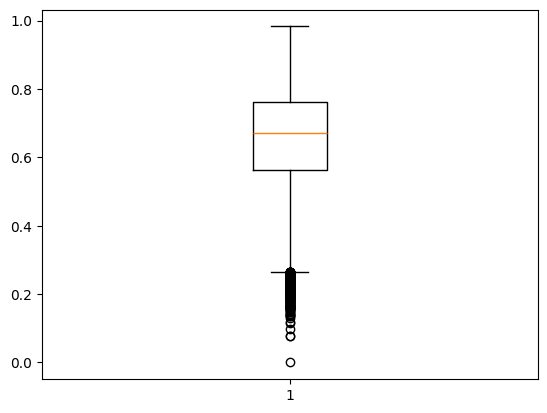

In [18]:

print(plt.boxplot(df[["danceability"]]))



{'whiskers': [<matplotlib.lines.Line2D object at 0x000001DE7931F4D0>, <matplotlib.lines.Line2D object at 0x000001DE7931C680>], 'caps': [<matplotlib.lines.Line2D object at 0x000001DE7931DAF0>, <matplotlib.lines.Line2D object at 0x000001DE7931D820>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001DE7931C650>], 'medians': [<matplotlib.lines.Line2D object at 0x000001DE7931E2A0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001DE7931E540>], 'means': []}


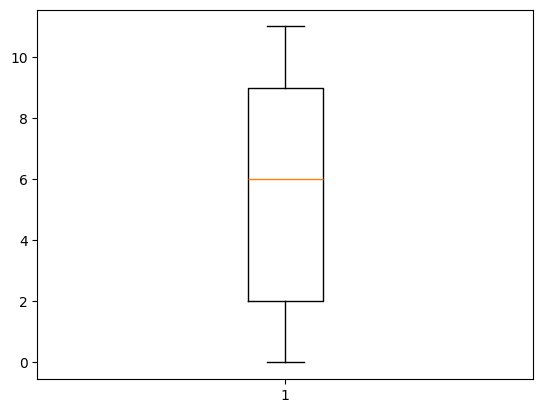

In [19]:
print(plt.boxplot(df[["key"]]))

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001DE7931F7D0>, <matplotlib.lines.Line2D object at 0x000001DE79FDFA10>], 'caps': [<matplotlib.lines.Line2D object at 0x000001DE79FDF470>, <matplotlib.lines.Line2D object at 0x000001DE79FDE180>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001DE7931FBC0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001DE79FDF080>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001DE79FDF350>], 'means': []}


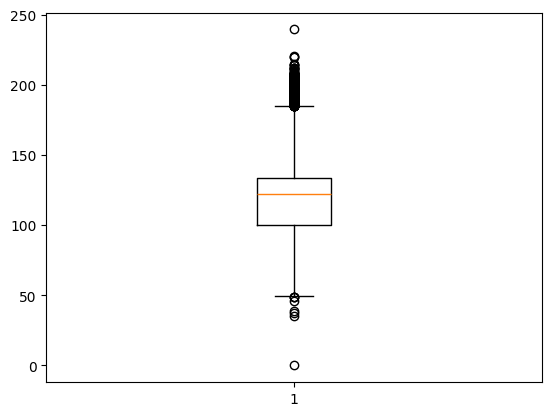

In [16]:
print(plt.boxplot(df[["tempo"]]))

### Key is categorical data so we split it into dummies

In [49]:
dummies = pd.get_dummies(df['key'], columns = ['key'])
dummies.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False


In [55]:
features = df[["danceability", "tempo"]]
features.head()

,danceability,tempo
0,0.748,122.036
1,0.726,99.972
2,0.675,124.008
3,0.718,121.956
4,0.650,123.976


In [59]:
# train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features = df[["danceability", "tempo"]]
z_scaler = StandardScaler().fit(features)
min_max_scaler = MinMaxScaler().fit(features)

# z score and min max normalization
features_z = pd.DataFrame(z_scaler.transform(features), columns=features.columns).join(dummies)
features_norm = pd.DataFrame(min_max_scaler.transform(features), columns=features.columns).join(dummies)

target = df["track_popularity"]

# target is the track_popularity
X_train_z, X_test_z, y_train, y_test = train_test_split(features_z, target, test_size=0.2, random_state=1402)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(features_norm, target, test_size=0.2, random_state=1402)

print(X_train_z.head())

       danceability     tempo      0      1      2      3      4      5  \
92         1.524302  0.041254  False  False  False  False   True  False   
4547       0.131997  0.117713  False  False  False  False  False   True   
8551       0.159567 -1.483062  False  False  False  False  False  False   
447        0.586908  0.079651  False  False  False  False  False  False   
19648      0.145782 -1.007580  False  False  False  False   True  False   

           6      7      8      9     10     11  
92     False  False  False  False  False  False  
4547   False  False  False  False  False  False  
8551   False  False  False  False  False   True  
447    False  False  False  False   True  False  
19648  False  False  False  False  False  False  


In [ ]:
# KNN Classifier

StandardScaler()

In [ ]:
# Linear Regression